# Finding the Band Gap 

## Equations
Densidad Óptica
\begin{equation}
O.D = \frac{\alpha l}{ln(10)}
\end{equation}
K (numero de onda) 
\begin{equation}
k = \frac{\alpha \lambda}{4\pi}
\end{equation}
Transmitancia y Reflectancia
\begin{align}
T = (1-R)^{2} e^{-\alpha l}\\
R =  1 -e^{\frac{1}{2}\alpha l}T^{\frac{1}{2}}
\end{align}


In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Variables

Importación de datos

In [127]:
class material:
            
    def __init__(self, name,refraction_coefficient):
        data = pd.read_excel('datos_tecnicas.xlsx')
        c1 = 100000000
        c2 = 100000000000
        self.name = name
        self.refraction_coefficient = refraction_coefficient
        self.wavelength = pd.to_numeric(data["Wavelength"], errors='coerce')
        self.transmitancia = pd.to_numeric(data[f'{self.name}_T']/c1, errors='coerce')
        self.absorbancia = pd.to_numeric(data[f'{self.name}_Abs']/c2, errors='coerce')    
        #self.l = 2 cm  #Espesor de la placa
        #do = (absorbancia*l)/(np.log(10))#Densidad optica

    def k_calc(self):
        '''
        Calcula el numero de onda  como k = (alpha*lambda)/4pi
        devuelve un dataframe de pandas
        '''
        size = self.absorbancia.size
        k = np.empty(size, dtype=float)
        for i in range(size):
            k[i] = self.absorbancia[i]*self.wavelength[i]/4*np.pi#Numero de onda
        return k 
    def graph_k(self,k):  
            '''
            Gráfica la longitud de onda vs el numero de onda k
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,k,label=self.name, color='red')
            plt.xlabel("longitud de onda")
            plt.ylabel("K")
            plt.title("Numero de onda "+self.name+" (k)")
            plt.show()
    def graph_abs(self):
            '''
            Gráfica la  la longitud de onda vs  absorbancia
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,self.absorbancia,label=self.name, color='green')
            plt.xlabel("longitud de onda (nm)")
            plt.ylabel("Absorbancia")
            plt.title("Absorbancia del "+self.name)
            plt.show()

    def graph_T(self):
            '''
            Gráfica la  la longitud de onda vs la transmitancia 
            '''
            plt.style.use('Solarize_Light2')
            plt.figure(figsize=(10,5))
            plt.scatter(self.wavelength,self.transmitancia,label=self.name, color='blue')
            plt.xlabel("longitud de onda (nm)")
            plt.ylabel("Transmitancia")
            plt.title("Transmitancia del "+self.name)
            plt.show()
       

    

In [128]:
vidrio =  material("Vidrio",1.5)
acetato = material("Acetato",1.5)
cristal = material("Cristal",1.5)

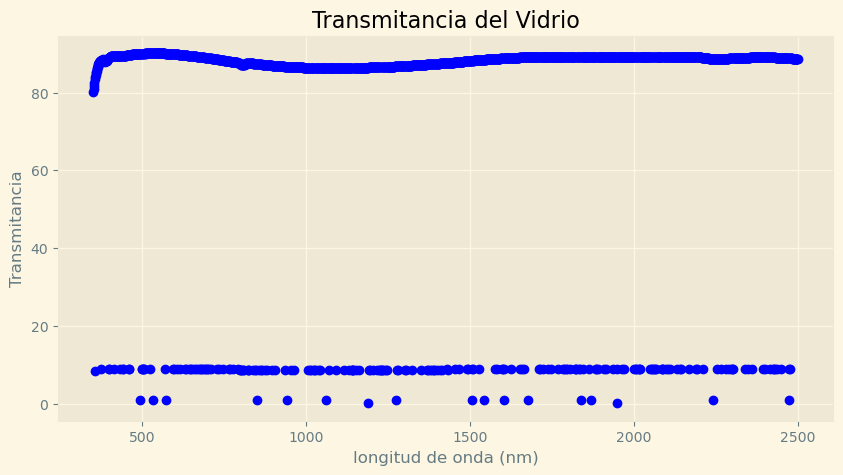

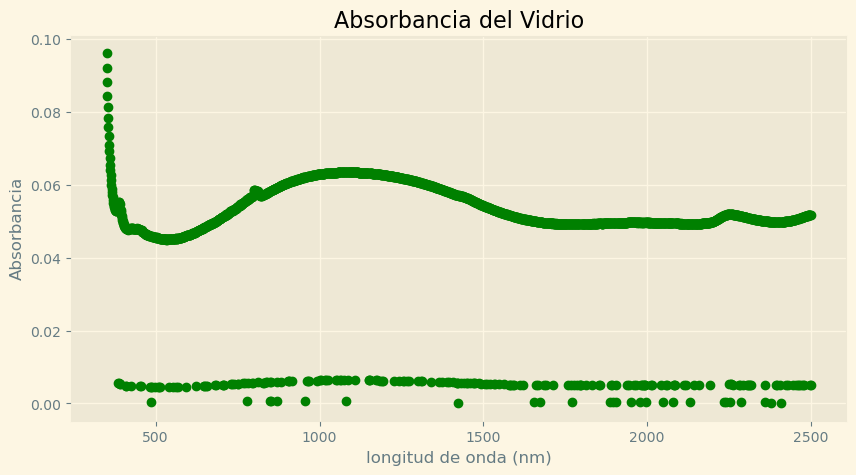

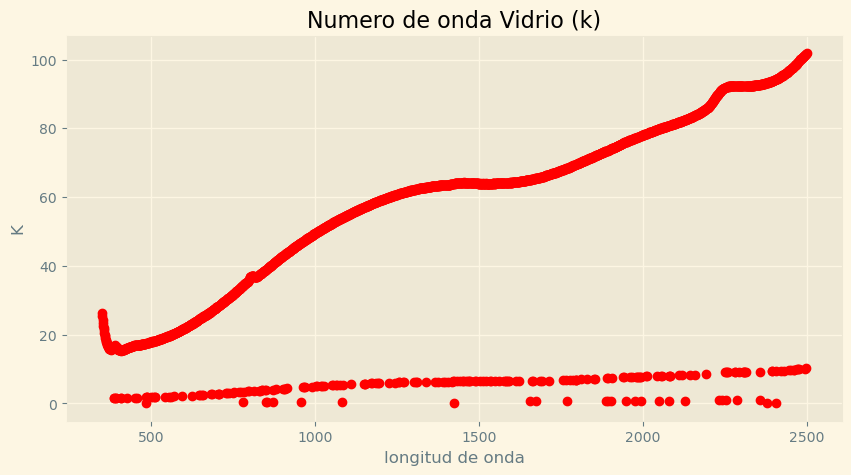

In [129]:
vidrio.graph_T()
vidrio.graph_abs()
vidrio.graph_k(vidrio.k_calc())

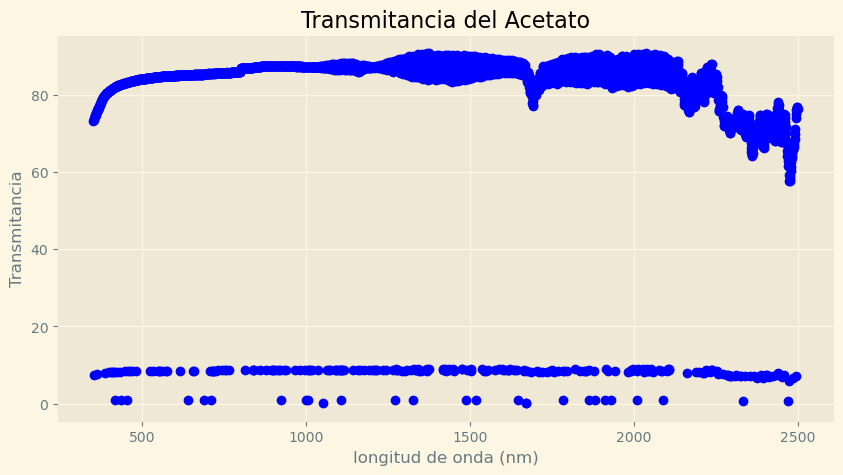

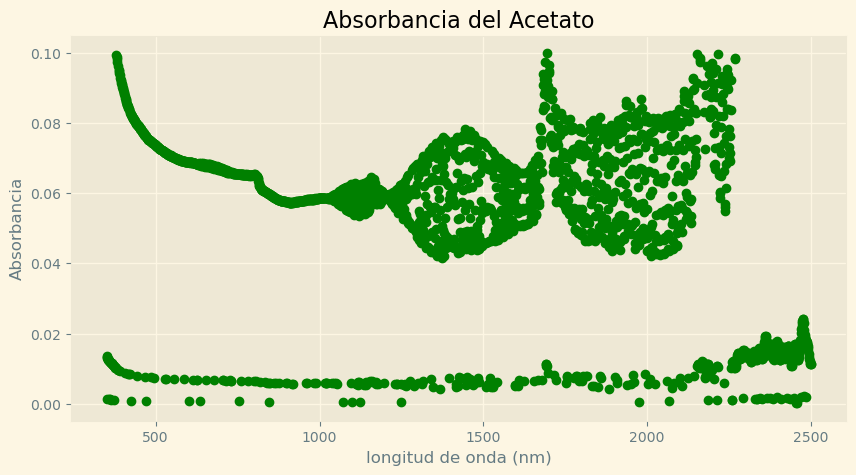

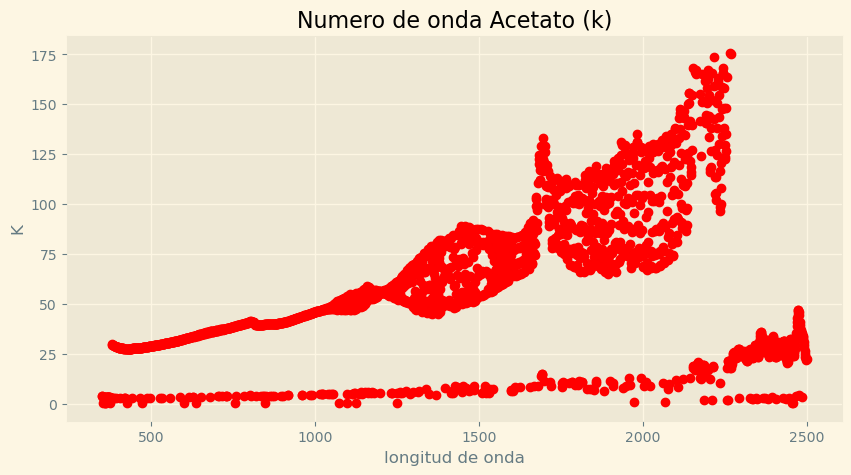

In [130]:
acetato.graph_T()
acetato.graph_abs()
acetato.graph_k(acetato.k_calc())

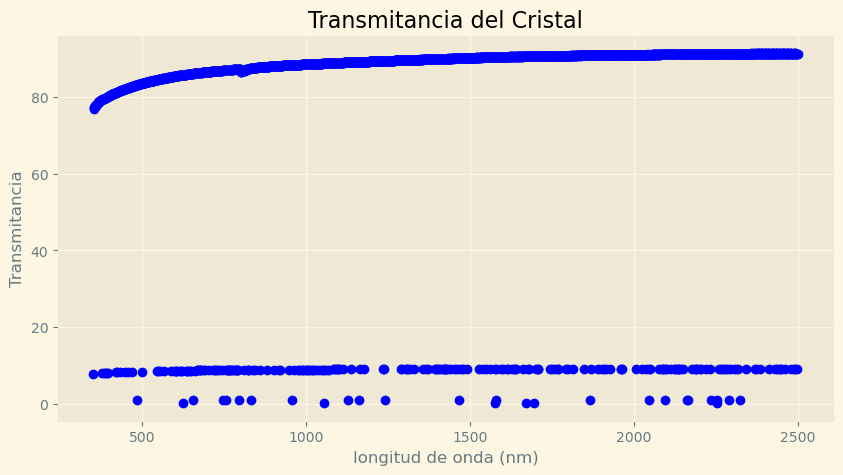

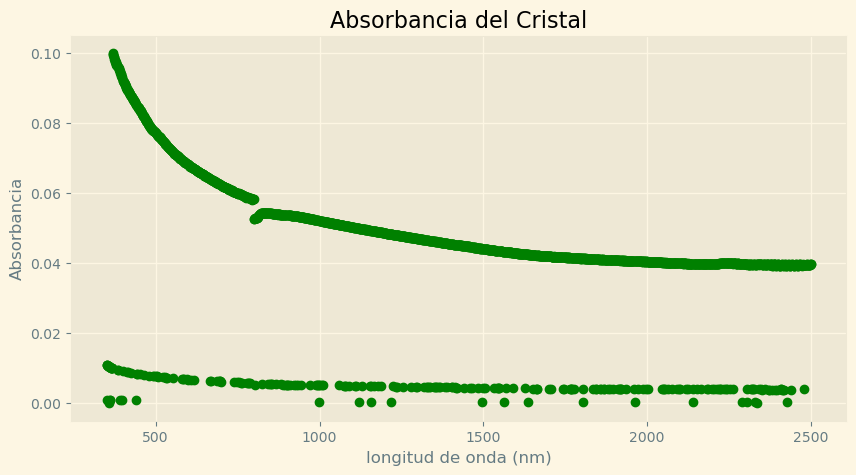

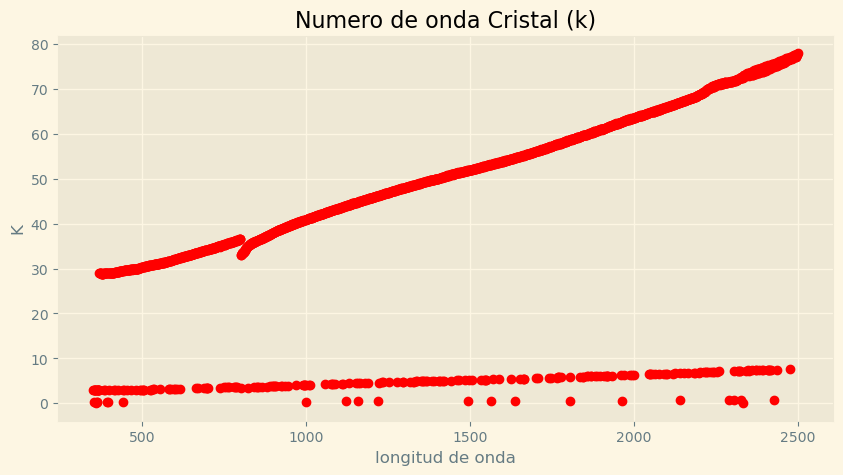

In [131]:
cristal.graph_T()
cristal.graph_abs()
cristal.graph_k(cristal.k_calc())